In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [90]:
def geometric_brownian_motion(x, mu, sigma, t):
    return x * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * np.random.normal(0, 1)) 

def log_geometric_brownian_motion(mu, sigma, t):
    return (mu - 0.5 * sigma ** 2) * t + sigma * np.random.normal(0, 1)

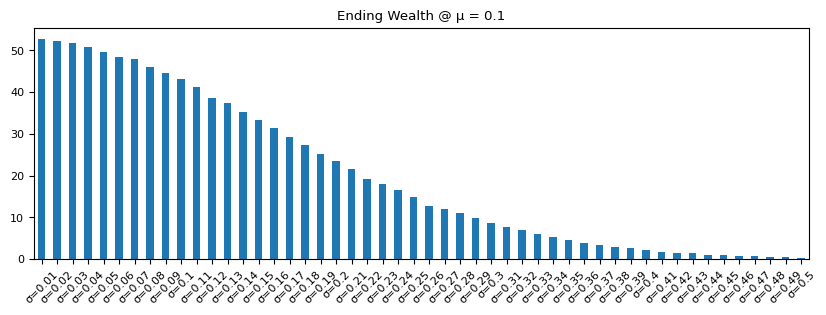

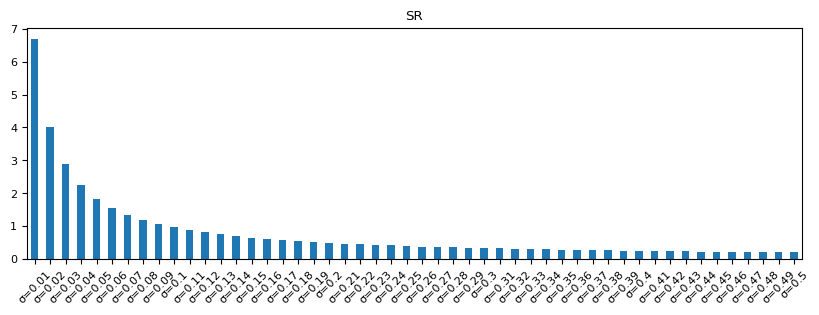

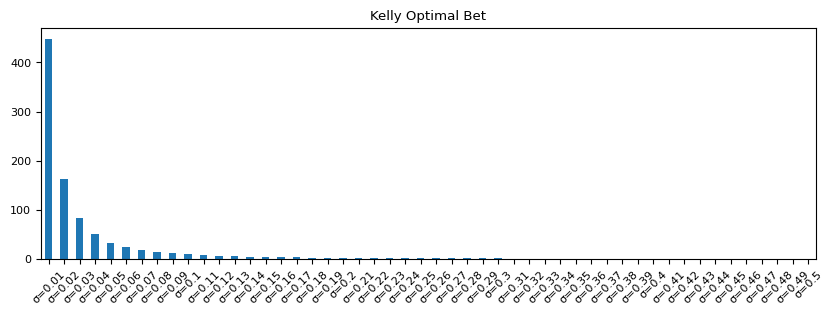

In [107]:
def variance_drag_monte_carlo_sim(x, mu, sigma, n):

    sims = {}
    sr = {}
    kelly = {}
    
    for sigma_i in sigma:
        formatted_sigma = np.round(sigma_i, 2)
        sr[f'σ={formatted_sigma}'] = mu / sigma_i
        kelly[f'σ={formatted_sigma}'] = sr[f'σ={formatted_sigma}'] / sigma_i
        sims[f'σ={formatted_sigma}'] = geometric_brownian_motion(x=x, 
                                                             mu=mu/252, 
                                                             sigma=sigma_i/np.sqrt(252), 
                                                             t=n
                                                             )            
            
    sims = pd.Series(sims)
    sr = pd.Series(sr)
    kelly = pd.Series(kelly)

    matplotlib.rcParams.update({'font.size': 8})

    ax = sims.plot(kind='bar', figsize=(10, 3))
    ax.set_xticklabels(sims.index, rotation=45)
    ax.set_title(f'Ending Wealth @ μ = {mu}')
    plt.show()

    ax = sr.plot(kind='bar', figsize=(10, 3))
    ax.set_xticklabels(sr.index, rotation=45)
    ax.set_title(f'SR')
    plt.show()

    ax = kelly.plot(kind='bar', figsize=(10, 3))
    ax.set_xticklabels(kelly.index, rotation=45)
    ax.set_title(f'Kelly Optimal Bet')
    plt.show()

    return 

X = 1
MU = 0.10
SIGMA = np.linspace(0.01, 0.5, 100)
N = 10000

variance_drag_monte_carlo_sim(X, MU, SIGMA, N)

In [314]:
def kelly_leverage_monte_carlo_sim(x: int, mu: float, sigma: float, leverage: list, n: int):

    sims = {}
    
    for leverage_i in leverage:
        levered_mu = leverage_i * mu
        levered_sigma = leverage_i * sigma 
        sims[f'L={leverage_i}'] = geometric_brownian_motion(x=x, 
                                                            mu=levered_mu/252, 
                                                            sigma=levered_sigma/np.sqrt(252), 
                                                            t=n
                                                            )        
            
    sims = pd.Series(sims)
    sims.index = [np.round(l, 2) for l in leverage]
    
    
    kelly_optimal_leverage = mu / sigma ** 2
    kelly_optimal_payoff = round(sims.iloc[np.argmin(np.abs(leverage - kelly_optimal_leverage))], 1)

    half_kelly_optimal_leverage = 0.5 * kelly_optimal_leverage
    half_kelly_optimal_payoff = round(sims.iloc[np.argmin(np.abs(leverage - half_kelly_optimal_leverage))], 1)

    double_kelly_optimal_leverage = 2 * kelly_optimal_leverage
    double_kelly_payoff = round(sims.iloc[np.argmin(np.abs(leverage - double_kelly_optimal_leverage))], 1)

    pe_leverage = 5
    pe_payoff = round(sims.iloc[np.argmin(np.abs(leverage - pe_leverage))], 1)
    
    
    matplotlib.rcParams.update({'font.size': 8})    

    fig, ax = plt.subplots(1, figsize=(10, 3))    
    sims.plot(kind='line', ax=ax, zorder=0, color='grey')
    ax.scatter(x=pe_leverage, y=pe_payoff, label=f'PE Leverage, Payoff={pe_payoff-1}', color='red', zorder=1)
    ax.scatter(x=double_kelly_optimal_leverage, y=double_kelly_payoff, label=f'Double Kelly Leverage, Payoff={double_kelly_payoff-1}', color='orange', zorder=1)
    ax.scatter(x=kelly_optimal_leverage, y=kelly_optimal_payoff, label=f'Kelly Leverage, Payoff={kelly_optimal_payoff-1}', color='lime', zorder=1)
    ax.scatter(x=half_kelly_optimal_leverage, y=half_kelly_optimal_payoff, label=f'Half Kelly Leverage, Payoff={half_kelly_optimal_payoff-1}', color='yellow', zorder=1)
    ax.set_title(f'Ending Wealth vs. Leverage @ μ = {mu}, σ = {sigma}')
    
    fig.legend()
    plt.show()

    return 

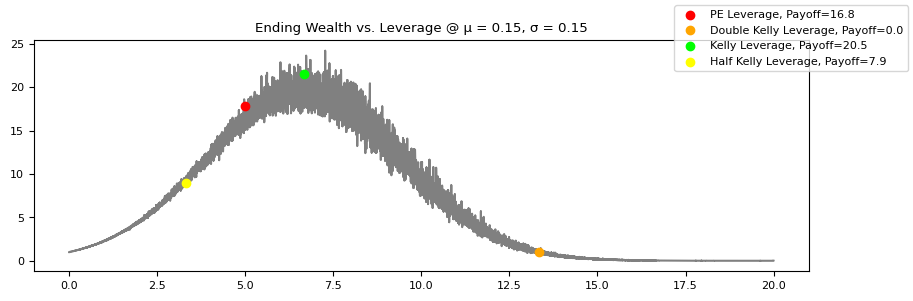

In [315]:
X = 1
MU = 0.15
SIGMA = 0.15
LEVERAGE = np.linspace(0.0, 20.0, 10000) 
N = 1500

kelly_leverage_monte_carlo_sim(X, MU, SIGMA, LEVERAGE, N)

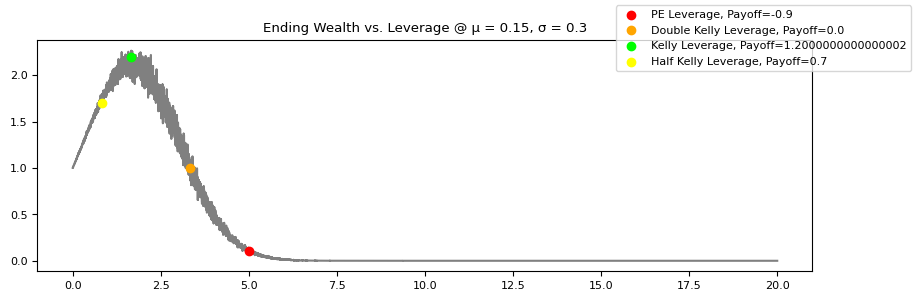

In [317]:
X = 1
MU = 0.15
SIGMA = 0.30
LEVERAGE = np.linspace(0.0, 20.0, 10000) 
N = 1500

kelly_leverage_monte_carlo_sim(X, MU, SIGMA, LEVERAGE, N)